kmeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [1]:
# import the libraries
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import sklearn

You can generate the data using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:

* n_samples is the total number of samples to generate.
* centers is the number of centers to generate.
* cluster_std is the standard deviation.

make_blobs() returns a tuple of two values:

+ A two-dimensional NumPy array with the x- and y-values for each of the samples
+ A one-dimensional NumPy array containing the cluster labels for each sample

Generate the synthetic data and labels

In [2]:
features, true_labels = make_blobs(
                                    n_samples=500,              # n_samples is the total number of samples to generate.
                                    centers=5,                  # centers is the number of centers to generate.
                                    cluster_std=2,              # cluster_std is the standard deviation.
                                    random_state=10
)

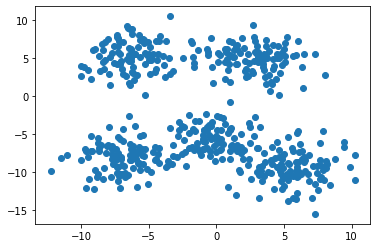

In [3]:
plt.scatter(features[:,0], features[:,1])

In [4]:
features

array([[-8.61699211e+00,  3.26221506e+00],
       [-4.21646083e-01,  7.66569067e+00],
       [-9.54937988e-01, -5.06694943e+00],
       [-8.20989998e+00,  7.11410617e+00],
       [ 2.10096068e+00,  3.25056105e+00],
       [ 7.68398317e+00, -1.09805811e+01],
       [-3.17093984e+00,  3.33879525e+00],
       [-2.51035702e+00, -7.61029904e+00],
       [ 6.13336809e+00, -9.99951998e+00],
       [-8.83620026e+00, -1.07101225e+01],
       [ 4.76021054e+00, -1.11677426e+01],
       [ 7.31141368e+00, -1.55441546e+01],
       [ 8.90590854e-01,  3.41070216e+00],
       [ 3.74141462e+00,  4.98428173e+00],
       [-6.15413880e+00, -9.51058868e+00],
       [-7.10971159e-01,  6.20897950e+00],
       [-8.65148179e+00, -7.26200418e+00],
       [ 7.93935739e+00, -1.10489000e+01],
       [ 5.13767934e+00, -1.03852377e+01],
       [-5.36262402e+00,  7.41836005e+00],
       [ 5.95743604e+00, -9.36786396e+00],
       [-6.15994182e+00,  5.64507068e+00],
       [ 1.00083074e+00, -7.35817843e-01],
       [-6.

In [5]:
true_labels

array([3, 1, 2, 3, 1, 0, 3, 2, 0, 4, 0, 0, 1, 1, 4, 1, 4, 0, 0, 3, 0, 3,
       2, 3, 4, 3, 4, 1, 3, 3, 1, 1, 4, 1, 0, 2, 0, 2, 1, 2, 3, 3, 1, 2,
       1, 0, 3, 0, 1, 3, 4, 3, 0, 4, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 3, 4,
       3, 2, 3, 4, 4, 2, 2, 2, 3, 3, 4, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 4,
       0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 1, 4, 3, 4, 4, 4, 2, 1, 3, 2, 0, 1,
       4, 0, 1, 1, 3, 3, 3, 0, 3, 0, 1, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 3,
       4, 1, 2, 2, 2, 1, 3, 4, 1, 2, 3, 3, 3, 0, 1, 2, 0, 0, 2, 4, 0, 0,
       4, 3, 4, 1, 4, 3, 1, 1, 1, 4, 1, 1, 0, 2, 3, 3, 3, 3, 3, 2, 2, 4,
       3, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 4, 4, 2, 4, 3,
       0, 1, 3, 4, 4, 1, 1, 1, 2, 3, 0, 2, 2, 1, 1, 0, 3, 2, 2, 4, 2, 4,
       1, 0, 1, 2, 3, 0, 4, 4, 4, 4, 2, 4, 4, 0, 4, 4, 2, 2, 3, 3, 4, 1,
       2, 2, 2, 1, 1, 3, 4, 4, 4, 3, 3, 1, 4, 4, 4, 0, 3, 2, 0, 0, 2, 1,
       0, 3, 2, 3, 0, 2, 4, 1, 4, 1, 0, 4, 4, 0, 3, 0, 0, 0, 2, 2, 0, 2,
       1, 3, 0, 4, 1, 2, 0, 0, 2, 4, 2, 4, 0, 4, 0,

## Data Preprocessing

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

### Standardization
 Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:
 
In this example, we’ll use the StandardScaler class.This class implements a type of feature scaling called standardization.

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

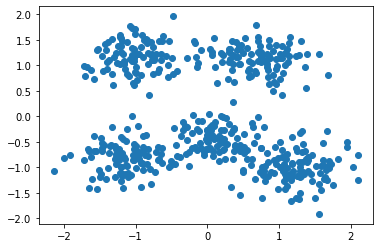

In [7]:
plt.scatter(scaled_features[:,0], scaled_features[:,1])

In [8]:
scaled_features

array([[-1.45516139e+00,  8.83710735e-01],
       [ 9.19862859e-02,  1.53877012e+00],
       [-8.69052830e-03, -3.55332661e-01],
       [-1.37830903e+00,  1.45671662e+00],
       [ 5.68213302e-01,  8.81977089e-01],
       [ 1.62219689e+00, -1.23504229e+00],
       [-4.27035538e-01,  8.95102775e-01],
       [-3.02328274e-01, -7.33680399e-01],
       [ 1.32946606e+00, -1.08910001e+00],
       [-1.49654431e+00, -1.19480898e+00],
       [ 1.07023631e+00, -1.26288437e+00],
       [ 1.55186185e+00, -1.91391778e+00],
       [ 3.39715218e-01,  9.05799620e-01],
       [ 8.77904252e-01,  1.13988473e+00],
       [-9.90214848e-01, -1.01636678e+00],
       [ 3.73664302e-02,  1.32207031e+00],
       [-1.46167247e+00, -6.81868185e-01],
       [ 1.67040738e+00, -1.24520540e+00],
       [ 1.14149626e+00, -1.14647924e+00],
       [-8.40789765e-01,  1.50197731e+00],
       [ 1.29625295e+00, -9.95135100e-01],
       [-9.91310363e-01,  1.23818345e+00],
       [ 3.60526710e-01,  2.88964854e-01],
       [-1.

## Kmeans

In [9]:
# initialize the model

kmeans = KMeans(
        init="k-means++",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42
    )

Here are the parameters used in this example:

* init :- controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

* n_clusters:- sets k for the clustering step. This is the most important parameter for k-means.

* n_init:- sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

* max_iter:- sets the number of maximum iterations for each initialization of the k-means algorithm.

In [10]:
# fit the data in k means

kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [11]:
# lowest SSE values

kmeans.inertia_

307.82514329478636

In [12]:
# final loaction of centroid

kmeans.cluster_centers_

array([[ 0.86054674, -0.76454506],
       [-0.15469652,  1.15574806],
       [-0.9734949 , -0.74810912]])

In [13]:
# the number of iteration required to converge

kmeans.n_iter_

6

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_

In [14]:
kmeans.labels_

array([1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2,
       1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1,
       0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,

In [15]:
count = 0
for i, j in zip(true_labels, kmeans.labels_):
    if i !=j :
        count += 1
print('Total number of true label not equal to kmeans.labels_:', count)

Total number of true label not equal to kmeans.labels_: 279


Text(0.5, 1.0, 'Clusters')

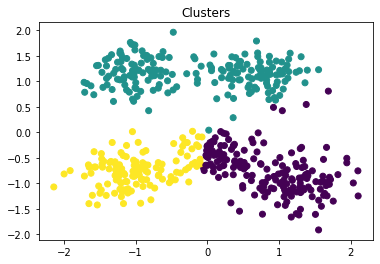

In [17]:
plt.scatter(scaled_features[:,0], scaled_features[:,1], c= kmeans.labels_)
plt.title('Clusters')

## Clustering performance evaluation

lets evaluate our cluster, by comparing the predicted labels with the true labels and for that we will use adjusted_rand_score

### adjusted_rand_score

* The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

* The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

reference: https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-score

In [18]:
adjusted_rand_score(true_labels, kmeans.labels_)

0.5475116472575091

ok lets evaluate for different number of cluster

# Choosing the Appropriate Number of Clusters

In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:

* The elbow method
* The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [19]:
kmeans_kwargs = {
        "init": "k-means++",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
}



In [20]:
# A list holds the SSE values for each k
sse = []

# list of similarity score between true_label and predicted_label for different number of cluster 
similarity_score = []     

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = adjusted_rand_score(true_labels, kmeans.labels_)
    print(f'for {k} cluster sse value = {kmeans.inertia_}')
    sse.append(kmeans.inertia_)
    
    similarity_score.append(score)

for 1 cluster sse value = 999.9999999999998
for 2 cluster sse value = 550.3298123261161
for 3 cluster sse value = 307.82514329478636
for 4 cluster sse value = 164.82771298173276
for 5 cluster sse value = 97.72128815615707
for 6 cluster sse value = 86.27000450484526
for 7 cluster sse value = 77.48395623907557
for 8 cluster sse value = 71.18610320704886
for 9 cluster sse value = 63.14964704397874
for 10 cluster sse value = 58.949625310481096


notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease

## plot to find optimal number of k

### Elbow Method

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters

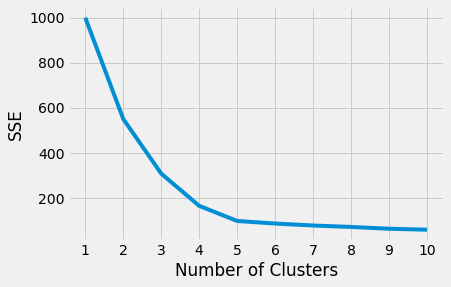

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Silhouette Coefficient¶
If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

s = (b - a)/{max(a, b)}

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient

In [22]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# we will start by iterating from 2 number of clusters

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [23]:
silhouette_coefficients

[0.4529778025652736,
 0.4883788148198214,
 0.5659035608375711,
 0.5821520416772826,
 0.5241666438774163,
 0.4672760940749493,
 0.4106869273894187,
 0.3693896325144193]

Plotting the average silhouette scores for each k

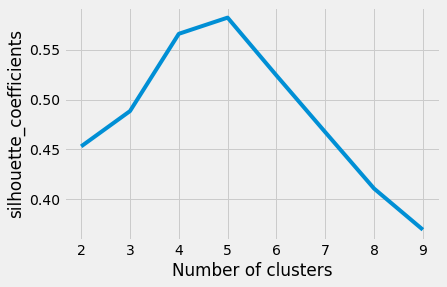

In [24]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,10), silhouette_coefficients)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

### PLOT the adjusted_rand_score to directly fid out the optimal number of clusters

Here we will find different kmeans by iterating it with increamenting value of k and for each k-means we will find the adjusted_rand_score and the value of k, for which adjusted_rand_score is maximum will be our opyimal k value.

In [25]:
# list of similarity score between true_label and predicted_label for different number of cluster 
similarity_score = []     

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = adjusted_rand_score(true_labels, kmeans.labels_)
    
    similarity_score.append(score)

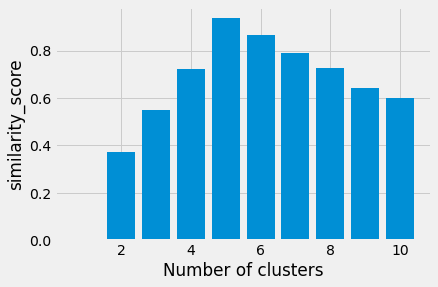

In [26]:
plt.style.use('fivethirtyeight')
plt.bar(range(1,11), similarity_score)
plt.xlabel('Number of clusters')
plt.ylabel('similarity_score')
plt.show()

so we can easily see that we 5 is the optimal number of clusters, so lets input n_clusters = 5 in our model 

In [27]:
kmeans = KMeans(
        init="k-means++",
        n_clusters=5,
        n_init=10,
        max_iter=300,
        random_state=10
    )

In [28]:
# fit the data in k means

kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=10)

In [29]:
# final loaction of centroid

kmeans.cluster_centers_

array([[-0.99562849,  1.18599812],
       [ 0.15026767, -0.46420228],
       [ 1.2672396 , -1.01718445],
       [-1.14481676, -0.82283865],
       [ 0.7019375 ,  1.12307213]])

In [30]:
# the number of iteration required to converge

kmeans.n_iter_

5

In [31]:
kmeans.labels_

array([0, 4, 1, 0, 4, 2, 0, 1, 2, 3, 2, 2, 4, 4, 3, 4, 3, 2, 2, 0, 2, 0,
       1, 0, 3, 0, 3, 4, 0, 0, 4, 4, 3, 4, 2, 1, 2, 3, 4, 1, 0, 0, 4, 1,
       4, 2, 0, 2, 4, 0, 3, 0, 2, 3, 1, 1, 4, 2, 4, 4, 4, 1, 1, 1, 0, 3,
       0, 1, 0, 3, 3, 1, 1, 1, 0, 0, 3, 1, 1, 4, 1, 4, 0, 2, 0, 1, 4, 3,
       2, 4, 4, 1, 0, 4, 2, 1, 4, 0, 4, 3, 0, 3, 3, 3, 1, 4, 0, 1, 2, 4,
       3, 2, 4, 4, 0, 0, 0, 2, 0, 2, 4, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0,
       3, 4, 1, 1, 1, 4, 0, 3, 4, 1, 0, 4, 0, 2, 4, 1, 2, 2, 1, 3, 2, 2,
       3, 0, 3, 4, 3, 0, 4, 4, 4, 3, 4, 4, 2, 1, 0, 0, 0, 0, 0, 1, 1, 3,
       0, 1, 1, 4, 4, 2, 4, 4, 4, 4, 2, 1, 4, 4, 4, 0, 4, 3, 3, 2, 3, 0,
       2, 4, 0, 3, 3, 4, 4, 4, 1, 0, 2, 1, 1, 4, 4, 2, 0, 1, 1, 3, 1, 3,
       4, 2, 4, 3, 0, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 1, 0, 0, 3, 4,
       1, 1, 1, 4, 4, 0, 3, 3, 3, 0, 0, 4, 3, 3, 3, 2, 0, 1, 2, 2, 1, 4,
       2, 0, 1, 0, 2, 1, 3, 4, 3, 4, 2, 3, 3, 2, 0, 2, 2, 2, 1, 1, 2, 1,
       4, 0, 2, 3, 4, 2, 2, 2, 2, 3, 1, 3, 2, 3, 2,

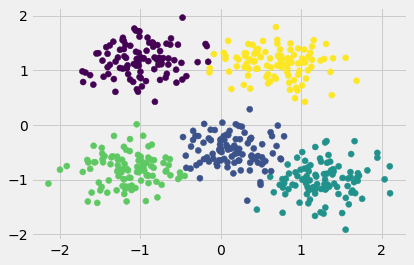

In [32]:
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=kmeans.labels_)